In [405]:
## Packages used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme(style="darkgrid")
import plotly

In [2]:
## Load data
pd.options.display.max_columns = None

#pt_one = pd.read_csv("datasets/NBA_Player_Stats.csv")
#pt_two = pd.read_csv("datasets/NBA_Player_Stats_2.csv") Same dataset but with MVP column
#nba_df = pd.concat([pt_one, pt_two])
#nba_df = pd.read_csv("datasets/NBA_Player_Stats.csv")

player_df = pd.read_csv('datasets/all_seasons.csv', index_col='Unnamed: 0')
player_df = player_df.sort_values(by='season').reset_index(drop=True)

player_df.head(20)

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,64,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,Loren Meyer,PHX,24.0,208.28,117.933920,Iowa State,USA,1995,1,24,54,4.9,2.7,0.4,-6.7,0.085,0.140,0.215,0.489,0.046,1996-97
2,Tony Smith,CHH,29.0,193.04,92.986360,Marquette,USA,1990,2,51,69,5.0,1.4,2.2,0.7,0.035,0.051,0.156,0.477,0.175,1996-97
3,Litterial Green,DET,27.0,185.42,83.914520,Georgia,USA,1992,2,39,45,2.0,0.5,0.9,17.0,0.025,0.055,0.159,0.531,0.224,1996-97
4,Lionel Simmons,SAC,28.0,200.66,95.254320,La Salle,USA,1990,1,7,41,3.4,2.5,1.4,-10.5,0.065,0.173,0.162,0.442,0.179,1996-97
5,Lindsey Hunter,DET,26.0,187.96,88.450440,Jackson State,USA,1993,1,10,82,14.2,2.8,1.9,5.1,0.025,0.071,0.201,0.515,0.088,1996-97
6,Reggie Miller,IND,31.0,200.66,83.914520,UCLA,USA,1987,1,11,81,21.6,3.5,3.4,0.9,0.021,0.092,0.250,0.603,0.170,1996-97
7,Reggie Slater,TOR,26.0,200.66,97.522280,Wyoming,USA,Undrafted,Undrafted,Undrafted,26,7.8,3.7,0.8,1.5,0.108,0.163,0.228,0.558,0.092,1996-97
8,Reggie Williams,NJN,33.0,201.00,86.000000,Georgetown,USA,1987,1,4,13,5.8,2.4,0.8,-12.8,0.026,0.142,0.196,0.468,0.093,1996-97
9,Steve Kerr,CHI,31.0,190.50,81.646560,Arizona,USA,1988,2,50,82,8.1,1.6,2.1,10.1,0.018,0.062,0.130,0.667,0.140,1996-97


In [3]:
## Data Preprocessing for player dataframe
player_df.shape

# Clean field names below

## Replace whitespace in column names and remove erroneous characters
player_df.columns = player_df.columns.str.replace('[ ]', "_", regex = True)

## Make column names all lowercase
player_df.columns = player_df.columns.str.lower()

#Fix nulls
player_df.loc[player_df['college'].isnull(), 'college'] = 'None'

#Add season year
player_df['start_year'] = player_df['season'].apply(lambda x: int(str(x)[:4]))

## Review how many nulls in data
player_df.isnull().sum().loc[lambda x : x>0].sort_values(ascending=False)



Series([], dtype: int64)

In [4]:
#Remove players that didn't play
player_df.drop(player_df[player_df['gp'] < 1].index)
#player_df['start_year'] = player_df['start_year'].astype('object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        12844 non-null  object 
 1   team_abbreviation  12844 non-null  object 
 2   age                12844 non-null  float64
 3   player_height      12844 non-null  float64
 4   player_weight      12844 non-null  float64
 5   college            12844 non-null  object 
 6   country            12844 non-null  object 
 7   draft_year         12844 non-null  object 
 8   draft_round        12844 non-null  object 
 9   draft_number       12844 non-null  object 
 10  gp                 12844 non-null  int64  
 11  pts                12844 non-null  float64
 12  reb                12844 non-null  float64
 13  ast                12844 non-null  float64
 14  net_rating         12844 non-null  float64
 15  oreb_pct           12844 non-null  float64
 16  dreb_pct           128

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,start_year
count,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000
mean,27.045313,200.555097,100.263279,51.154158,8.212582,3.558486,1.824681,-2.226339,0.054073,0.140646,0.184641,0.513138,0.131595,2009.609467
std,4.339211,9.111090,12.426628,25.084904,6.016573,2.477885,1.800840,12.665124,0.043335,0.062513,0.053545,0.101724,0.094172,7.879836
min,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1996.000000
25%,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.482000,0.066000,2003.000000
50%,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.040000,0.130500,0.181000,0.525000,0.103000,2010.000000
75%,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.083000,0.179000,0.217000,0.563000,0.179000,2017.000000
max,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000,2022.000000


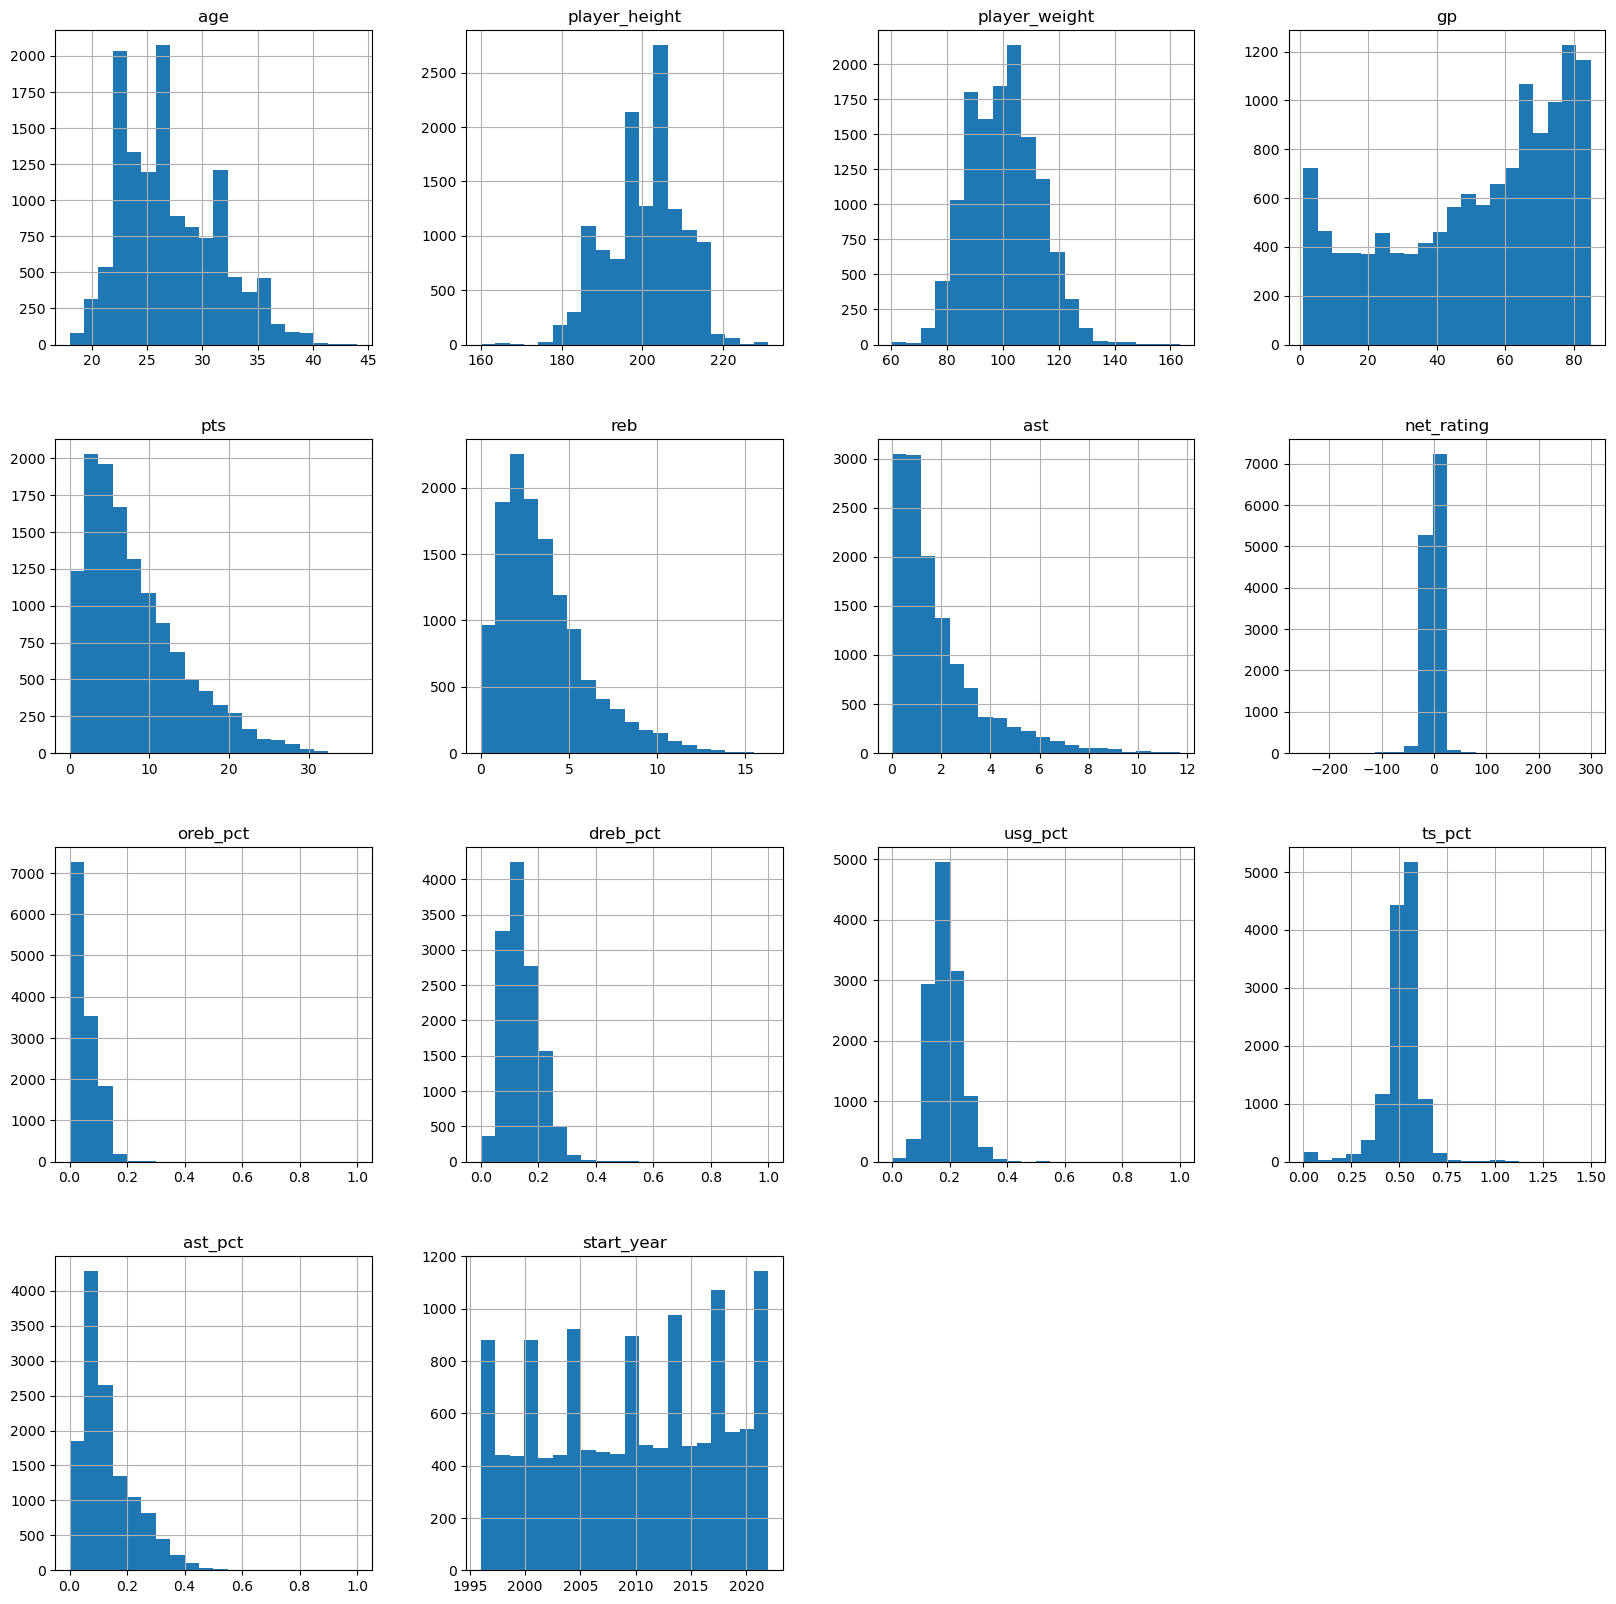

In [5]:
## View all numeric variables 
player_df.hist(figsize=(20,20),bins = 20)
#nba_df.hist(figsize=(20,20),bins = 20)
plt.show()

Based on what we see distributed, the following are metrics to look at:
- age
- gp (games played)
- game stats (pts, reb, oreb_pct, dreb_pct, ast)
- advanced stats (usg_pct, ts_pct, net_rating, ast_pct)
- measurements (height, weight)

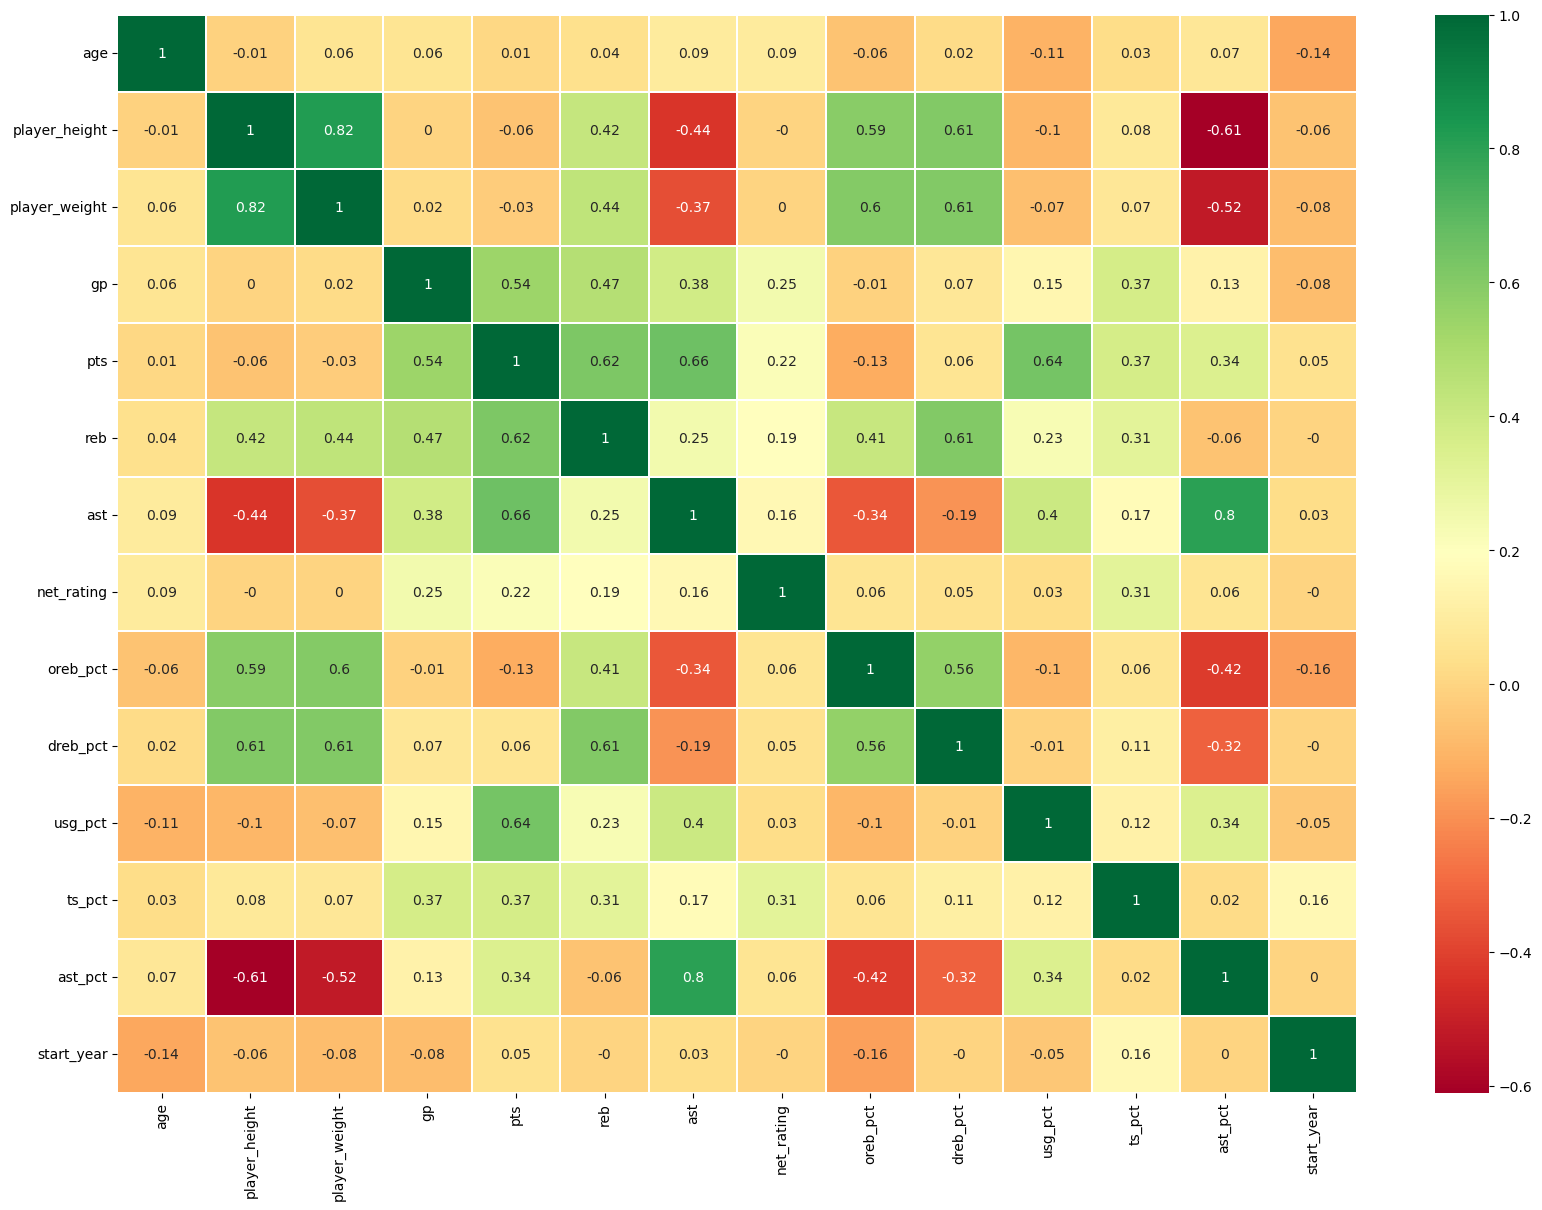

In [6]:
matrix_df = player_df.select_dtypes(include=['number'])

corr_matrix = matrix_df.corr().round(2)
f, ax = plt.subplots(figsize=(20, 14))

sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', linewidths=.1)
plt.show()

Looking at the correlations above:
- I see mostly correlations I expected but need to dive into stats in categorical view
    - View time series
    - View grouped by team
    - View grouped by draft
- Note: Something I want to explore would be with categorical values against the numeric
    - Possibly review team tenure and player performance. The idea is to see if there is relevance for being on certain teams against others.
    - Review tenure on first team versus after
        - Compare to what round they are drafted
    - Look at measurements against performance
    - Look at draft position to performance
    


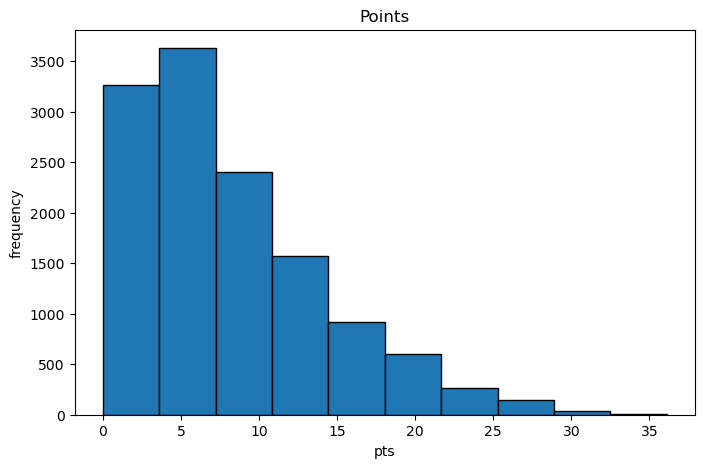

In [7]:
plt.figure(figsize=(8, 5))
plt.hist(player_df['pts'], bins=10, edgecolor='black')
plt.title('Points')
plt.xlabel('pts')
plt.ylabel('frequency')
plt.show()

In [8]:
player_df.head(2)

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,start_year
0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,64,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97,1996
1,Loren Meyer,PHX,24.0,208.28,117.933920,Iowa State,USA,1995,1,24,54,4.9,2.7,0.4,-6.7,0.085,0.140,0.215,0.489,0.046,1996-97,1996


In [9]:
##Plot measurements

def plot_column(col):
    new_df = pd.DataFrame(player_df.groupby(['start_year'])[col].mean())
    new_df = new_df.rename({'player_name': f'Average {col}'}, axis=1)
    new_df.reset_index().head()
    plt.figure(figsize=(20,10))

    sns.lineplot(x='start_year', y=col, data=new_df)
    title = (' '.join(col.split('_'))).title()
    plt.title(f'Average {title}', fontsize=20)
    plt.show()

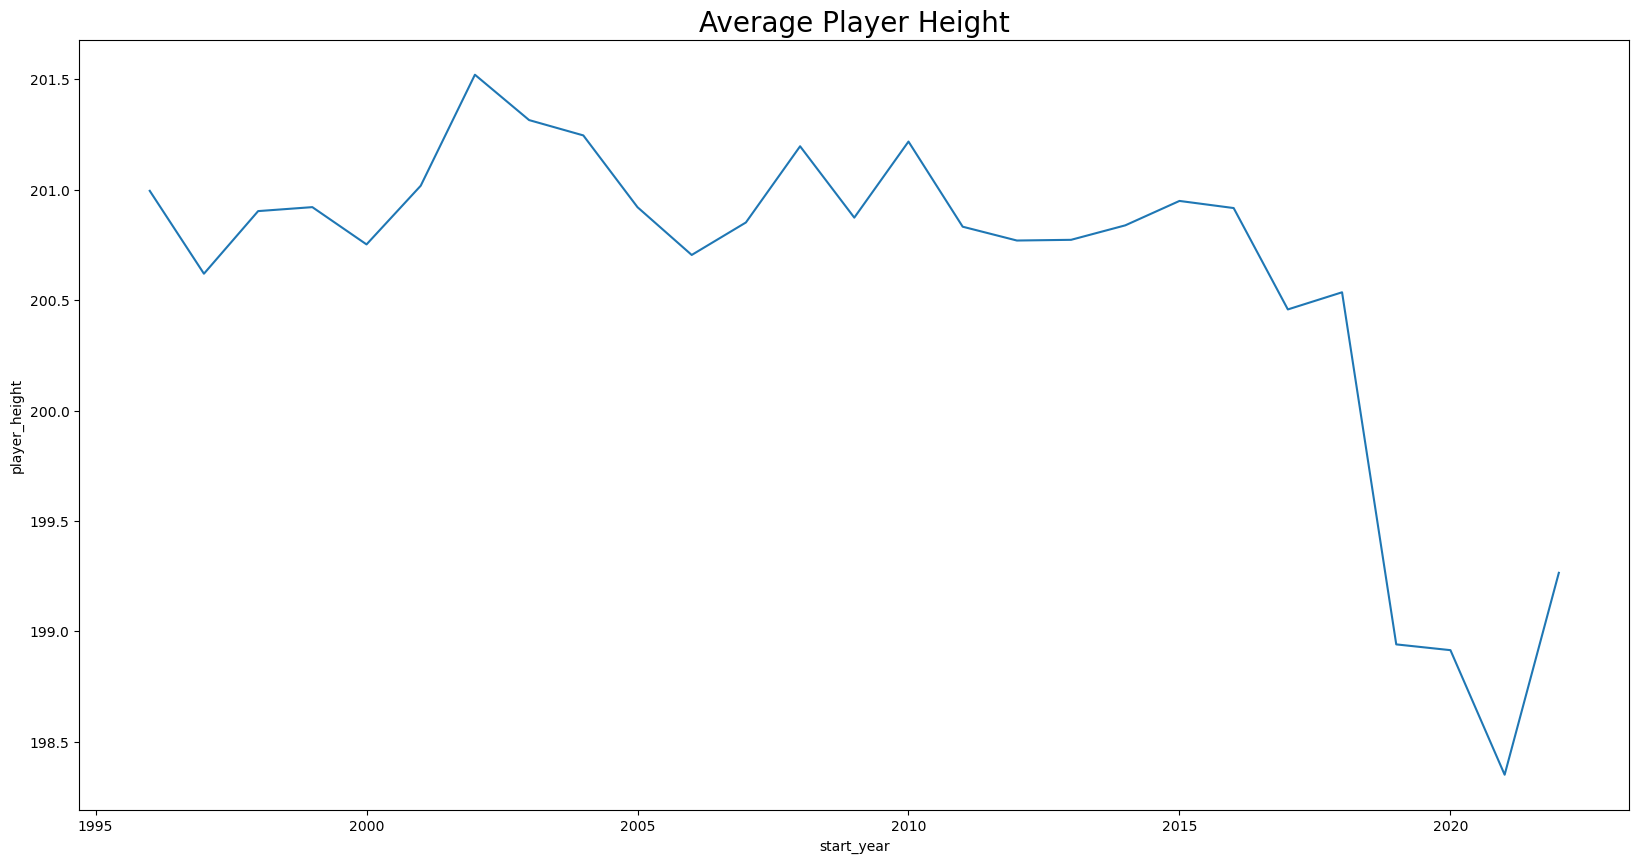

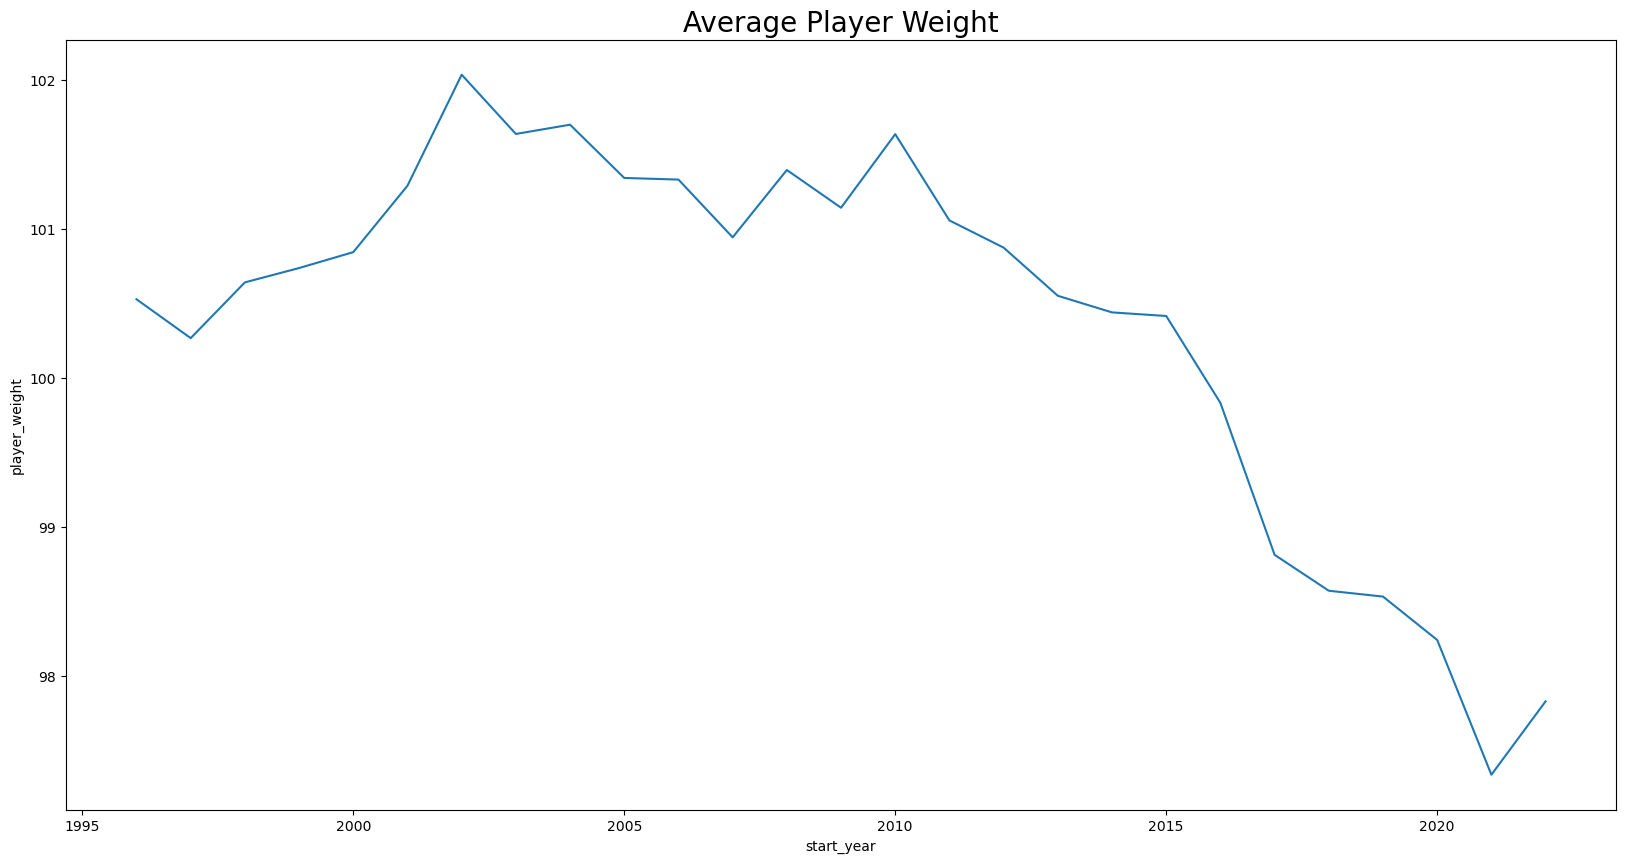

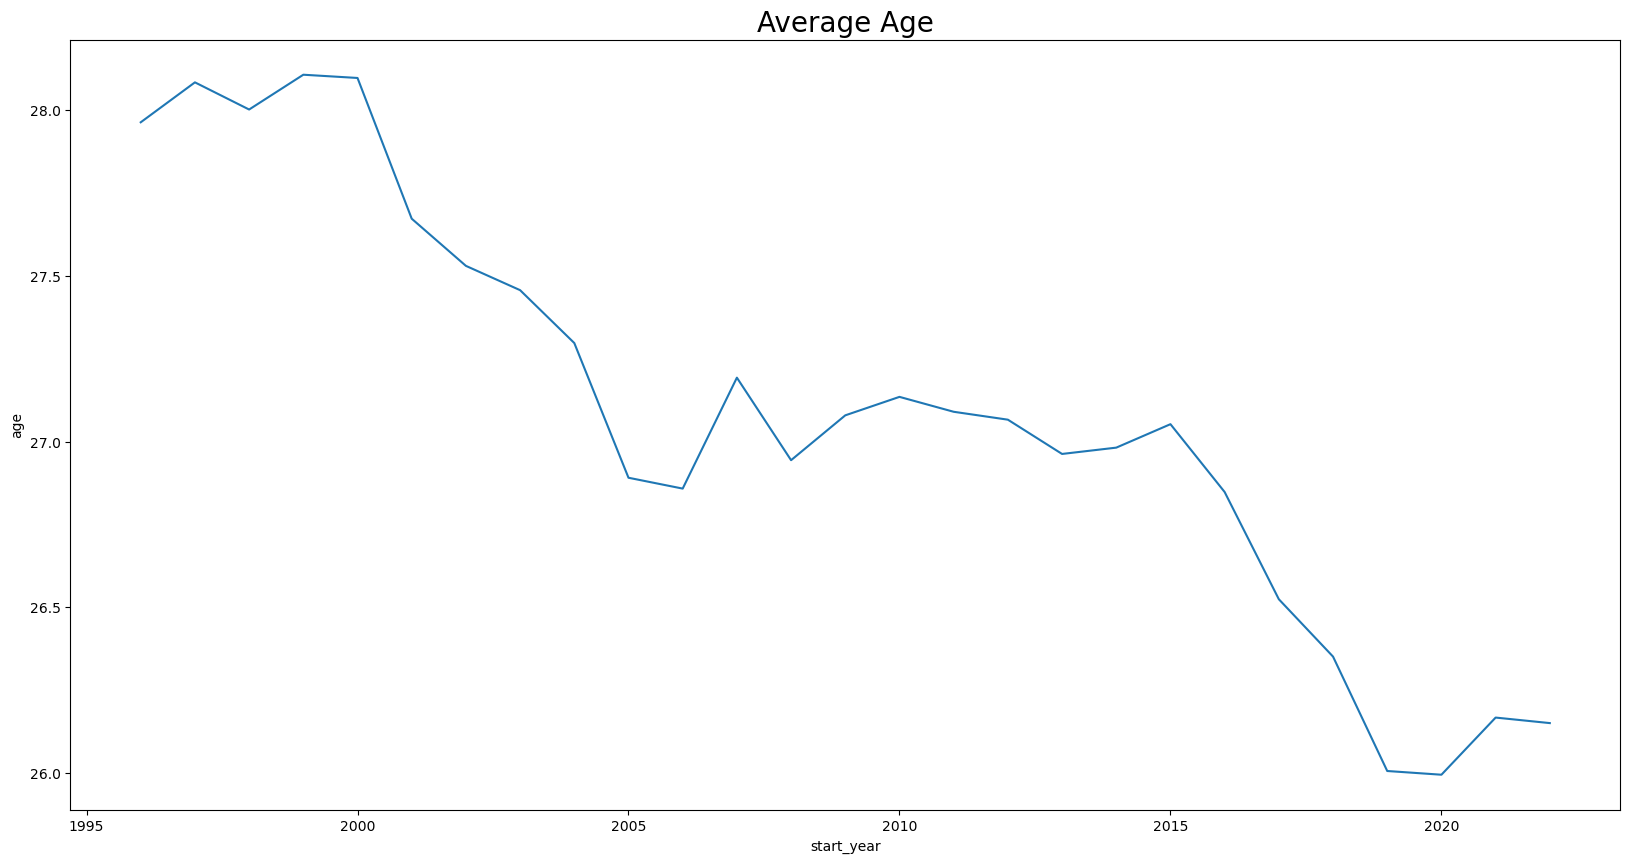

In [10]:
plot_column('player_height')
plot_column('player_weight')
plot_column('age')

The NBA has changed with teams now going with players currently shorter, smaller, and younger.
I want to isolate to those that are drafted. 

In [11]:
# Datasets to work with

#Rookie year
first_year = player_df[player_df['draft_year'] == player_df['season'].apply(lambda x: x[:4])] 

#Rank player to team across years
player_df['year_rank'] = player_df.groupby(['player_name', 'team_abbreviation'])['start_year'].rank(method='max') 

In [101]:
first_year

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,start_year
0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,64,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97,1996
11,Tony Delk,CHH,23.0,187.96,85.728888,Kentucky,USA,1996,1,16,61,5.4,1.6,1.6,0.9,0.044,0.090,0.182,0.596,0.187,1996-97,1996
16,Todd Fuller,GSW,22.0,210.82,115.665960,North Carolina State,USA,1996,1,11,75,4.0,3.3,0.3,-8.6,0.127,0.171,0.166,0.480,0.040,1996-97,1996
24,Lorenzen Wright,LAC,21.0,210.82,108.862080,Memphis,USA,1996,1,7,77,7.3,6.1,0.6,-3.7,0.120,0.168,0.146,0.503,0.039,1996-97,1996
31,Kerry Kittles,NJN,23.0,195.58,81.192968,Villanova,USA,1996,1,8,82,16.4,3.9,3.0,-5.2,0.035,0.082,0.199,0.523,0.139,1996-97,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12692,Moussa Diabate,LAC,21.0,208.28,95.254320,Michigan,France,2022,2,43,22,2.7,2.3,0.2,-3.2,0.137,0.106,0.125,0.546,0.029,2022-23,2022
12770,Dyson Daniels,NOP,20.0,200.66,90.264808,None,Australia,2022,1,8,59,3.8,3.2,2.3,0.4,0.035,0.140,0.113,0.503,0.172,2022-23,2022
12797,Tari Eason,HOU,22.0,203.20,97.522280,Louisiana State,USA,2022,1,17,82,9.3,6.0,1.1,-4.8,0.101,0.172,0.184,0.525,0.075,2022-23,2022
12804,Shaedon Sharpe,POR,20.0,195.58,90.718400,Kentucky,Canada,2022,1,7,80,9.9,3.0,1.2,-7.6,0.037,0.102,0.186,0.568,0.079,2022-23,2022


In [509]:
player_df.loc[player_df['player_name'] == 'Rajon Rondo']

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,start_year,year_rank
4839,Rajon Rondo,BOS,21.0,185.42,77.564232,Kentucky,USA,2006,1,21,78,6.4,3.7,3.8,-0.3,0.047,0.147,0.164,0.472,0.260,2006-07,2006,1.0
5039,Rajon Rondo,BOS,22.0,185.42,77.564232,Kentucky,USA,2006,1,21,77,10.6,4.2,5.1,14.1,0.044,0.117,0.189,0.515,0.263,2007-08,2007,2.0
5387,Rajon Rondo,BOS,23.0,185.42,77.564232,Kentucky,USA,2006,1,21,80,11.9,5.2,8.2,10.8,0.049,0.139,0.191,0.543,0.377,2008-09,2008,3.0
6115,Rajon Rondo,BOS,24.0,185.42,77.564232,Kentucky,USA,2006,1,21,81,13.7,4.4,9.8,4.8,0.043,0.103,0.200,0.540,0.425,2009-10,2009,4.0
6436,Rajon Rondo,BOS,25.0,185.42,77.564232,Kentucky,USA,2006,1,21,68,10.6,4.4,11.2,8.9,0.045,0.096,0.181,0.495,0.448,2010-11,2010,5.0
6861,Rajon Rondo,BOS,26.0,185.42,84.368112,Kentucky,USA,2006,1,21,53,11.9,4.8,11.7,5.2,0.039,0.111,0.203,0.483,0.498,2011-12,2011,6.0
7404,Rajon Rondo,BOS,27.0,185.42,84.368112,Kentucky,USA,2006,1,21,38,13.7,5.6,11.1,-1.3,0.036,0.139,0.215,0.516,0.490,2012-13,2012,7.0
7690,Rajon Rondo,BOS,28.0,185.42,84.368112,Kentucky,USA,2006,1,21,30,11.7,5.5,9.8,-10.7,0.023,0.184,0.209,0.461,0.480,2013-14,2013,8.0
8416,Rajon Rondo,DAL,29.0,185.42,84.368112,Kentucky,USA,2006,1,21,68,8.9,5.5,7.9,-1.2,0.039,0.161,0.194,0.448,0.393,2014-15,2014,1.0
8702,Rajon Rondo,SAC,30.0,185.42,84.368112,Kentucky,USA,2006,1,21,72,11.9,6.0,11.7,-3.4,0.033,0.150,0.187,0.506,0.473,2015-16,2015,1.0


As mentioned above, these are things I'm interested in:
- Possibly review team tenure and player performance. The idea is to see if there is relevance for being on certain teams against others.
- Review tenure on first team versus after
- Compare to what round they are drafted
- Look at draft position to performance

How can I use categorical data to look at what I'm interested in?
- Lump teams and players performance (done)
- Look at performance on first team against second team
- Look at drafted players and isolate to specific group that is valued (1st rounders) (done)
- Look at schools player came from (done)


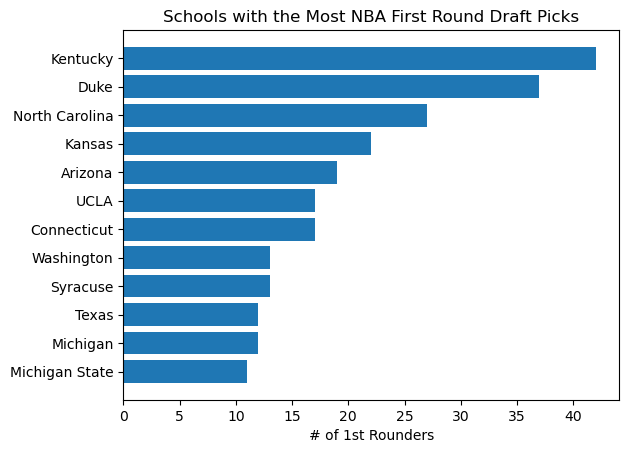

In [359]:
# Exclude undrafted players and see which college the drafted ones come from

#Only want to see top draft picks
dataset = first_year.loc[(first_year['draft_round'] == '1') & (first_year['college'] != 'None')]

dataset = dataset.groupby(['college'])['draft_round'].count()
dataset = dataset.reset_index()

#Exlcude noise
dataset = dataset.loc[(dataset['draft_round'] > 10) & (dataset['college'] != 'None')]

dataset = dataset.sort_values(by=['draft_round'])

# Create horizontal bars
plt.barh(y=dataset['college'], width=dataset['draft_round'])
plt.xlabel('# of 1st Rounders')

plt.title('Schools with the Most NBA First Round Draft Picks')
# Display the plots
plt.show()



In [510]:
def population_sort(row):
    if row['draft_year'] < 2009:
        val = 'old'
    else:
        val = 'new'
    return val
first_year['draft_pop'] = first_year.apply(population_sort, axis=1)
first_year

TypeError: '<' not supported between instances of 'str' and 'int'

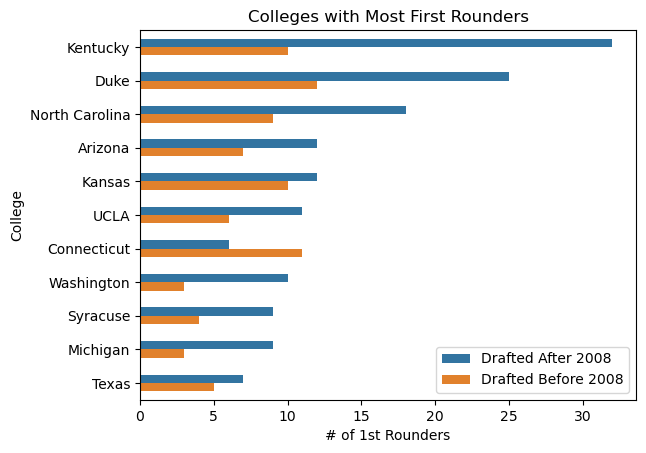

,college,draft_pop,draft_round
75,Kentucky,new,32
43,Duke,new,25
115,North Carolina,new,18
2,Arizona,new,12
72,Kansas,new,12
44,Duke,old,12
38,Connecticut,old,11
178,UCLA,new,11
73,Kansas,old,10
76,Kentucky,old,10


In [381]:
#Show stacked plot against first 13 years to last 13 years (school dominance should shift)
# Can show era of recruiting vs where they are recruiting now

#Only want to see top draft picks
population = first_year.loc[(first_year['draft_round'] == '1') & (first_year['college'] != 'None')]
comparison = population.groupby(['college','draft_pop'])['draft_round'].count().reset_index()
comparison = comparison.sort_values(by=['draft_round'], ascending=False)

#Exclude noise (Schools that have more than 5 first rounders)
comparison = comparison.loc[(comparison['draft_round'] > 5)]
new_comp = ranked_college.loc[(ranked_college['ranking'] <= 10)]
new_comp = new_comp.groupby(['college','draft_pop'])['draft_round'].count().reset_index()
new_comp = new_comp.sort_values(by=['draft_round'], ascending=False)

# Create bars
sns.barplot(y=new_comp['college'], x=new_comp['draft_round'], 
            hue=new_comp['draft_pop'], data=comparison, errorbar=None ,width=0.5)
plt.xlabel('# of 1st Rounders')
plt.ylabel('College')
plt.legend().set_title('')
plt.legend(labels = ['Drafted After 2008', 'Drafted Before 2008'])
plt.title('Colleges with Most First Rounders')
plt.show()
comparison
# Display the plots
#plt.show()

<BarContainer object of 36 artists>

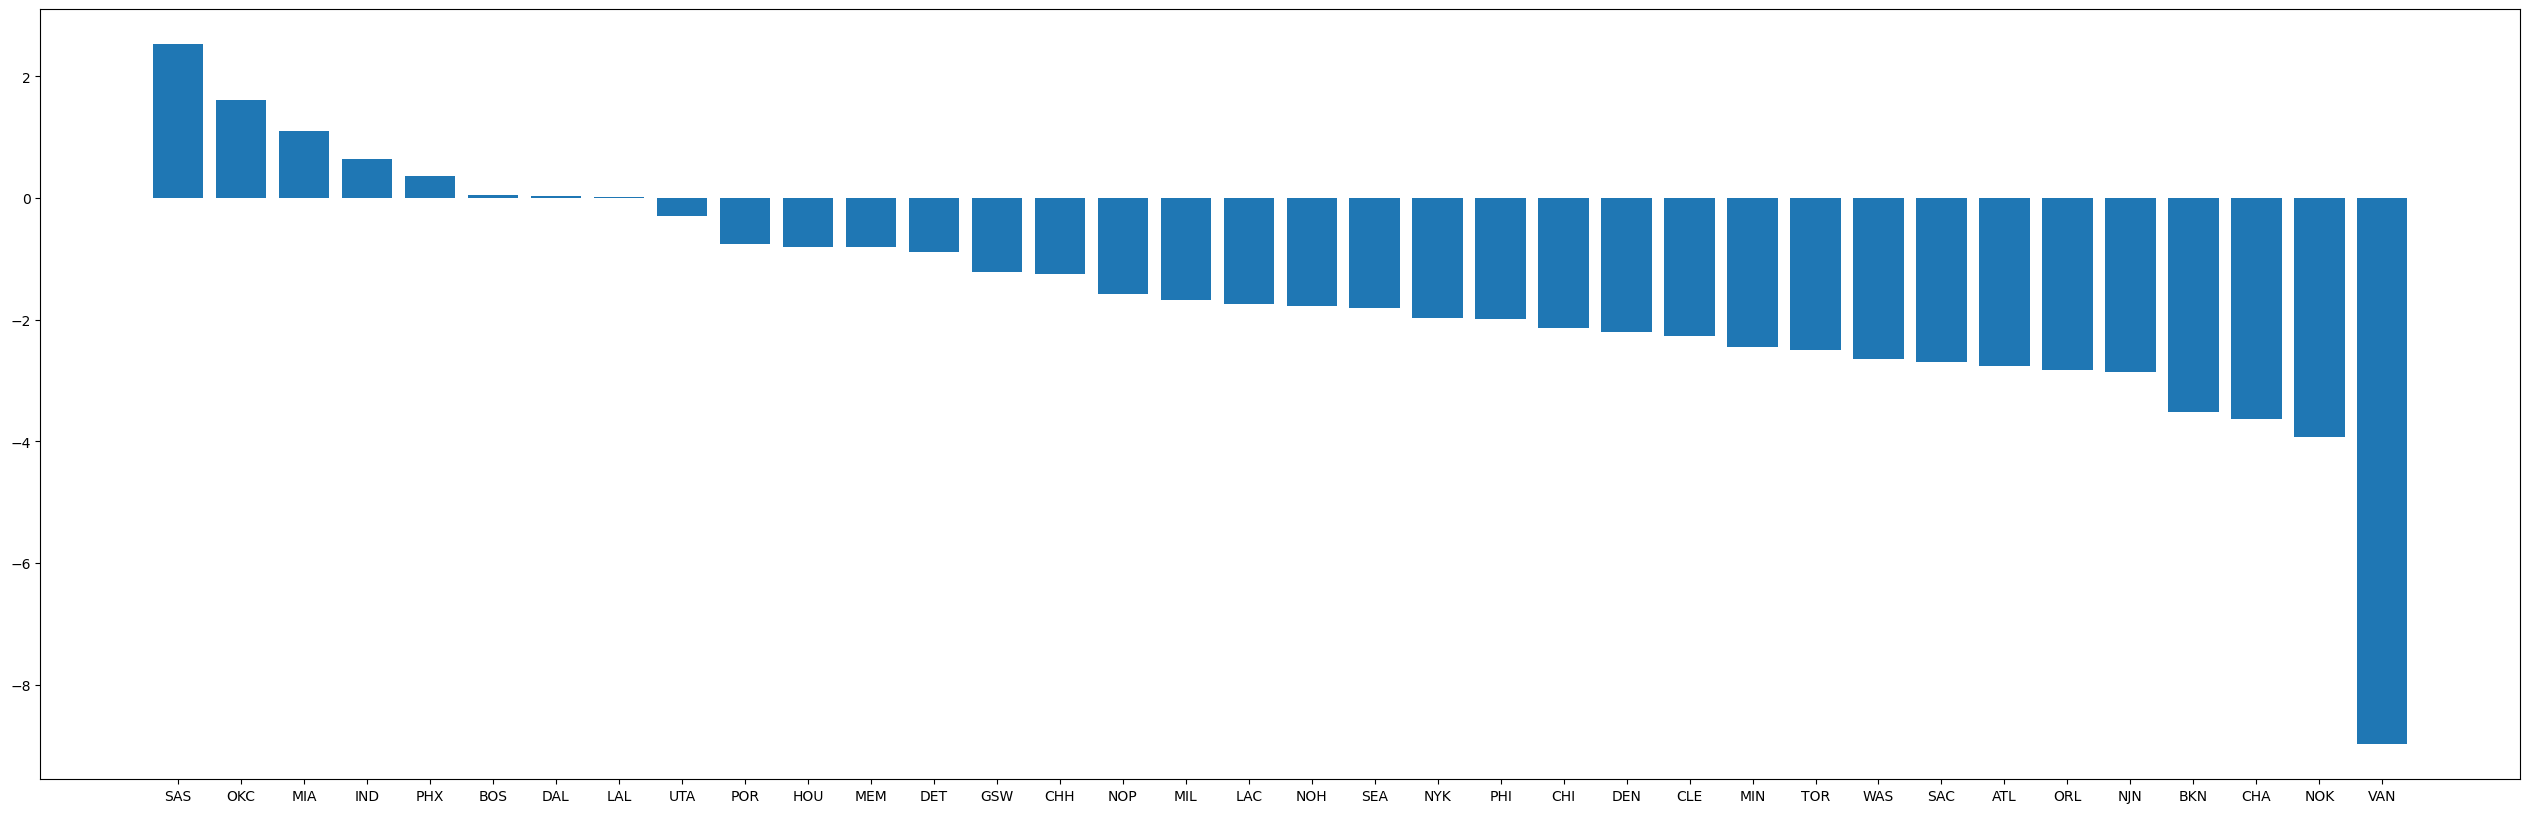

In [14]:
# Look at same population but performance in NBA
perf_df = player_df.loc[(player_df['draft_round'] == '1') & (player_df['college'] != 'None')]
perf_df = pd.DataFrame(perf_df.groupby(['team_abbreviation'])['net_rating'].mean())
perf_df = perf_df.reset_index()
perf_df = perf_df.sort_values(by=['net_rating'], ascending=False)


#plt.bar(perf_df['team_abbreviation'], perf_df['net_rating'], width=.8)
plt.figure(figsize=(32, 10))
display(plt.bar(perf_df['team_abbreviation'], perf_df['net_rating']))

Per source:
<a href="https://ballunlocked.com/what-is-net-rating-nba/">Net Rating Definition</a>
- Net Rating in NBA is a statistical measure that calculates the point differential a team scores per 100 possessions while on the court.
- Net Rating is an essential tool for evaluating team performance and player efficiency in the NBA, as it takes into account both offensive and defensive performance.
- Net Plus-Minus is a primary component of Net Rating and is calculated by comparing a team’s point differential with a specific player on and off the court.
- Net rating is a metric to measure player performance. A positive rating equates to We can see that teams with higher net rating usually 

My notes:
- The top teams historically have won a lot of games or are competitive. 
- Based on our population, first round picks have more success on the teams that are net zero or positive
- This is a tangential graph that I can tie back to college

In [15]:
player_df['draft_year'] = player_df['draft_year'].replace(to_replace='Undrafted', value=0)
player_df['draft_year'] = pd.to_numeric(player_df['draft_year'])
player_df.draft_year.unique()
#player_df.loc[~player_df['draft_year'].isin(player_df.start_year.unique())]
#player_df['start_year'] = player_df['start_year'].astype('int')
#player_df.dtypes['draft_year']

array([1996, 1995, 1990, 1992, 1993, 1987,    0, 1988, 1994, 1989, 1981,
       1986, 1985, 1991, 1982, 1984, 1976, 1980, 1983, 1978, 1979, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 1963, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021, 2022])

In [70]:
# Same population (exclude players drafted before 1996) and determine average tenure in NBA

complete_df = player_df.loc[(player_df['draft_round'] == '1') & (player_df['college'] != 'None') & (player_df['draft_year'] > 1996)]
test = complete_df.groupby(['player_name'])['pts'].mean().reset_index()
test['pts'].mean()

9.036657253339133

In [17]:
#Compare players in original team against other teams
initial_df = complete_df.loc[(complete_df['draft_year'] == complete_df['start_year']) & \
                             (player_df['draft_year'] > 1996)]
initial_df = initial_df.groupby(['player_name', 'team_abbreviation'])['start_year'].count().reset_index()
initial_df = initial_df.rename(columns={'start_year': 'count_year', 'team_abbreviation': 'team'})

In [18]:
#test = pd.merge(complete_df, initial_df)
test_df = pd.merge(initial_df, complete_df, on='player_name', how='left')

test_df = pd.DataFrame(test_df)

In [19]:
first_team = test_df.loc[(test_df['team_abbreviation'] == test_df['team'].values)]

other_team = test_df.loc[(test_df['team_abbreviation'] != test_df['team'].values)]

In [507]:
df
values=df.loc[0].drop('player_name').values.flatten().tolist()
df = df.sort_values(by=['pts'], ascending=False)
values += values[:1]
df

,player_name,pts,reb,ast,net_rating
445,Shai Gilgeous-Alexander,31.4,4.8,5.5,2.7
279,Anthony Davis,28.1,11.1,2.3,5.0
256,Anthony Davis,28.0,11.8,2.1,1.7
446,Devin Booker,27.8,4.5,5.5,6.2
258,DeMarcus Cousins,27.0,11.0,4.6,-2.2
...,...,...,...,...,...
100,Scott Padgett,1.5,1.7,0.3,2.7
220,Nazr Mohammed,1.2,1.7,0.1,1.6
165,Jamaal Magloire,1.2,3.3,0.2,6.5
241,James Young,1.0,0.9,0.3,-6.1


KeyError: 1

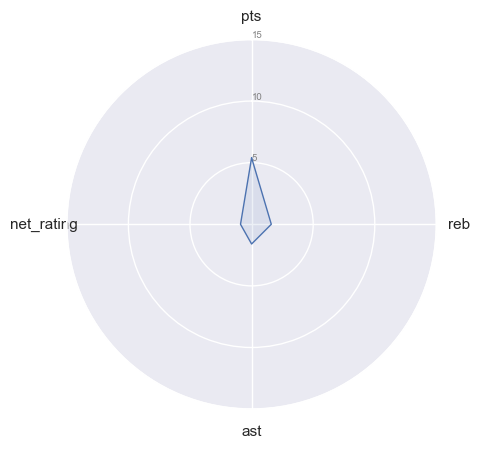

In [501]:
# Testing what view would look like 
#Set data
df = college_analysis[['player_name','pts', 'reb', 'ast', 'net_rating']].loc[(college_analysis['college'] == 'Kentucky')]
df = df.sort_values(by=['pts'], ascending=False)
# number of variable
categories=list(df[['pts', 'reb', 'ast', 'net_rating']])[0:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([5,10,15], ["5","10","15"], color="grey", size=7)
plt.ylim(0,15)
 
 

# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('player_name').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=df.loc[0]['player_name'])
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('player_name').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=df.loc[1]['player_name'])
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()


Grabbed the above from: https://python-graph-gallery.com/391-radar-chart-with-several-individuals/

I tried to play around with the the radar graph but the story I want to tell might not work? I'll revisit this if it makes sense

,player_name,pts
0,Devin Booker,24.275000
1,Anthony Davis,23.818182
2,Karl-Anthony Towns,23.225000
3,Shai Gilgeous-Alexander,21.880000
4,De'Aaron Fox,20.566667
5,DeMarcus Cousins,19.036364
6,John Wall,18.472727
7,Jamal Murray,17.416667
8,Tyler Herro,17.350000
9,Julius Randle,16.977778


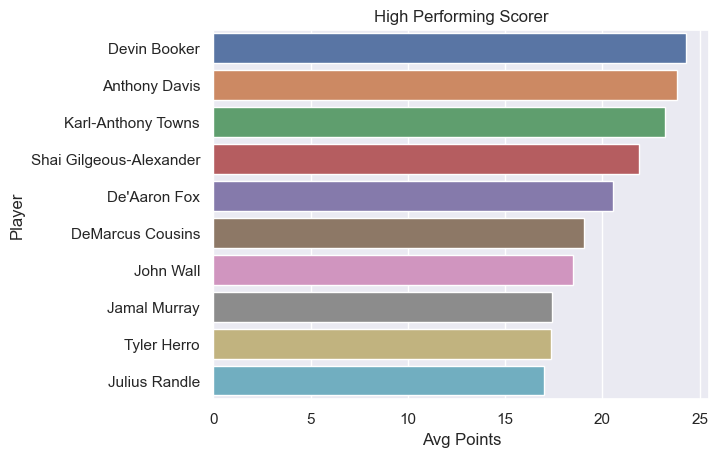

In [562]:
stat_leader_per_season = pd.DataFrame(kentucky_players.groupby(['player_name'])['pts'].mean())
stat_leader_per_season = stat_leader_per_season.sort_values(by=['pts'], ascending=False).reset_index()
stat_leader_per_season = stat_leader_per_season.loc[(stat_leader_per_season['pts'] > 16)]
sns.barplot(x='pts', y='player_name', data=stat_leader_per_season, orient='h')
plt.ylabel('Player')
plt.xlabel('Avg Points')
plt.title('High Performing Scorer')
stat_leader_per_season

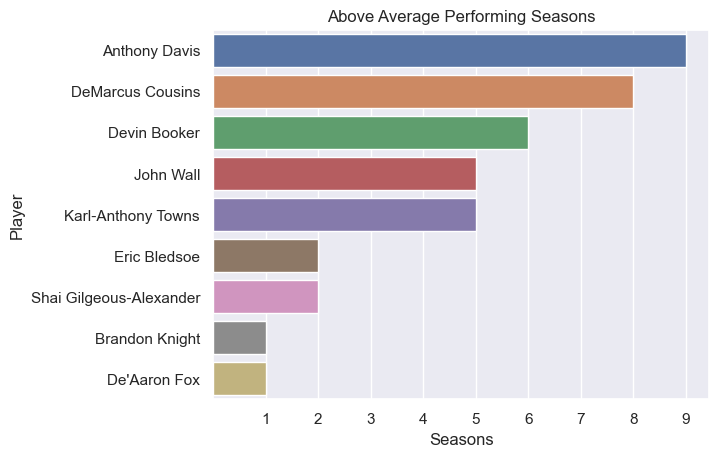

In [539]:
#college_analysis['draft_pop'] = college_analysis.apply(population_sort, axis=1)
kentucky_players = college_analysis.loc[(college_analysis['college'] == 'Kentucky') & \
                                        (college_analysis['draft_pop'] == 'new')]
def get_top_stat(stat):
    stat_leader_per_season = kentucky_players.groupby('season')[stat].nlargest(3).reset_index()
    top_stat = kentucky_players.loc[stat_leader_per_season['level_1']].player_name.value_counts().reset_index()
    top_stat = top_stat[:10]

    sns.barplot(x='count', y='player_name', data=top_stat, orient='h')

    plt.xticks([i+1 for i in range(max(top_stat['count']))])
    plt.ylabel('Player')
    plt.xlabel('Seasons')
    plt.title('Above Average Performing Seasons')

    plt.show()
    
get_top_stat('pts')

Don't think this is something that can paint a picture, I want

Stuck on what I was ambitious about but need to go back to basics. 

Look at college data again and see below
- Show stats by college
- Go deeper into top net rating teams
- Look into age and college
- Maybe look at survival rate in NBA?
- Take a look at the none values I put in the university column and see if they are useful and can analyze that


In [255]:
#population with college first round count and rank
college = population.groupby(['college'])['draft_round'].count().reset_index()
college = college.sort_values(by=['draft_round'], ascending=False).reset_index()
college = college.reset_index()
del college['index']
college.rename(columns={'level_0': 'ranking', 'draft_round': 'num_first_rounders'}, inplace=True)

#Merged ranking into first round population dataset
ranked_college=college.merge(population,left_on="college",right_on="college",suffixes=('_left', '_right'))

ranked_college

,ranking,college,num_first_rounders,player_name,team_abbreviation,age,player_height,player_weight,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,start_year,draft_pop
0,0,Kentucky,42,Tony Delk,CHH,23.0,187.96,85.728888,USA,1996,1,16,61,5.4,1.6,1.6,0.9,0.044,0.090,0.182,0.596,0.187,1996-97,1996,old
1,0,Kentucky,42,Walter McCarty,NYK,23.0,208.28,104.326160,USA,1996,1,19,35,1.8,0.7,0.4,3.2,0.056,0.080,0.217,0.431,0.116,1996-97,1996,old
2,0,Kentucky,42,Antoine Walker,BOS,20.0,205.74,101.604608,USA,1996,1,6,82,17.5,9.0,3.2,-9.3,0.103,0.189,0.251,0.474,0.150,1996-97,1996,old
3,0,Kentucky,42,Derek Anderson,CLE,23.0,195.58,88.450440,USA,1997,1,13,66,11.7,2.8,3.4,3.9,0.038,0.091,0.215,0.531,0.219,1997-98,1997,old
4,0,Kentucky,42,Ron Mercer,BOS,22.0,200.66,95.254320,USA,1997,1,6,80,15.3,3.5,2.2,-2.8,0.044,0.084,0.224,0.491,0.114,1997-98,1997,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,137,Saint Louis,1,Larry Hughes,PHI,20.0,195.58,83.914520,USA,1998,1,8,50,9.1,3.8,1.5,1.1,0.093,0.126,0.246,0.474,0.150,1998-99,1998,old
626,138,San Jose State,1,Tariq Abdul-Wahad,SAC,23.0,198.12,101.151016,France,1997,1,11,59,6.4,2.0,0.9,-7.0,0.048,0.085,0.217,0.456,0.087,1997-98,1997,old
627,139,Miami,1,Lonnie Walker IV,SAS,20.0,195.58,92.986360,USA,2018,1,18,17,2.6,1.0,0.5,-24.3,0.000,0.122,0.196,0.446,0.143,2018-19,2018,new
628,140,South Florida,1,Dominique Jones,DAL,22.0,195.58,97.522280,USA,2010,1,25,18,2.3,1.4,1.1,-8.7,0.052,0.165,0.222,0.400,0.241,2010-11,2010,new


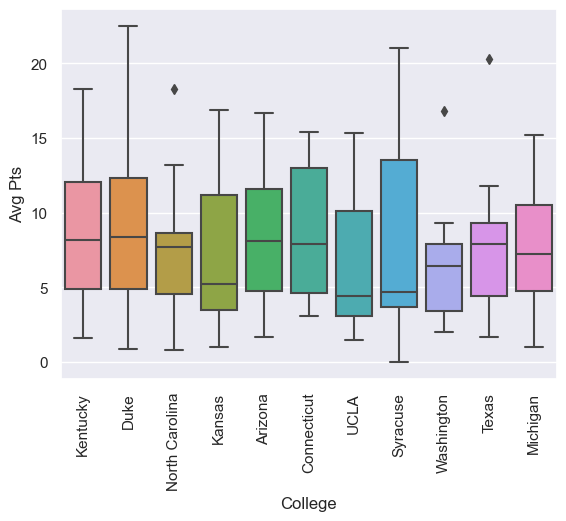

,ranking,college,num_first_rounders,player_name,team_abbreviation,age,player_height,player_weight,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,start_year,draft_pop
0,0,Kentucky,42,Tony Delk,CHH,23.0,187.96,85.728888,USA,1996,1,16,61,5.4,1.6,1.6,0.9,0.044,0.090,0.182,0.596,0.187,1996-97,1996,old
2,0,Kentucky,42,Antoine Walker,BOS,20.0,205.74,101.604608,USA,1996,1,6,82,17.5,9.0,3.2,-9.3,0.103,0.189,0.251,0.474,0.150,1996-97,1996,old
21,0,Kentucky,42,James Young,BOS,19.0,198.12,97.522280,USA,2014,1,17,31,3.4,1.4,0.4,-2.9,0.027,0.110,0.153,0.457,0.059,2014-15,2014,new
3,0,Kentucky,42,Derek Anderson,CLE,23.0,195.58,88.450440,USA,1997,1,13,66,11.7,2.8,3.4,3.9,0.038,0.091,0.215,0.531,0.219,1997-98,1997,old
4,0,Kentucky,42,Ron Mercer,BOS,22.0,200.66,95.254320,USA,1997,1,6,80,15.3,3.5,2.2,-2.8,0.044,0.084,0.224,0.491,0.114,1997-98,1997,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,9,Texas,12,Tristan Thompson,CLE,21.0,205.74,102.965384,Canada,2011,1,4,60,8.2,6.5,0.5,-11.6,0.144,0.166,0.192,0.469,0.035,2011-12,2011,new
215,9,Texas,12,Jordan Hamilton,DEN,21.0,200.66,99.790240,USA,2011,1,26,26,4.4,2.4,0.8,6.9,0.052,0.199,0.221,0.508,0.114,2011-12,2011,new
216,9,Texas,12,Cory Joseph,SAS,20.0,190.50,83.914520,Canada,2011,1,29,29,2.0,0.9,1.2,-9.2,0.020,0.094,0.153,0.374,0.189,2011-12,2011,new
217,9,Texas,12,Myles Turner,IND,20.0,210.82,110.222856,USA,2015,1,11,60,10.3,5.5,0.7,-1.3,0.054,0.207,0.211,0.531,0.050,2015-16,2015,new


In [406]:
performance = ranked_college.sort_values(by=['ranking'], ascending=False)
performance = performance.loc[(performance['ranking'] < 11)]
performance['draft_number'] = pd.to_numeric(performance['draft_number'])
performance = performance.sort_values(by=['num_first_rounders'], ascending=False)
sns.boxplot(performance,x='college',y='pts')
plt.xlabel('College')
plt.ylabel('Avg Pts')
plt.xticks(rotation=90)
plt.show()
performance
#Showing the schools with the most first rounders and the player points in their first season
#Rank the plots by median to be seamless to graph in previous slide
#Potentially put median against scatterplot to show correlation
#Add title to clarify

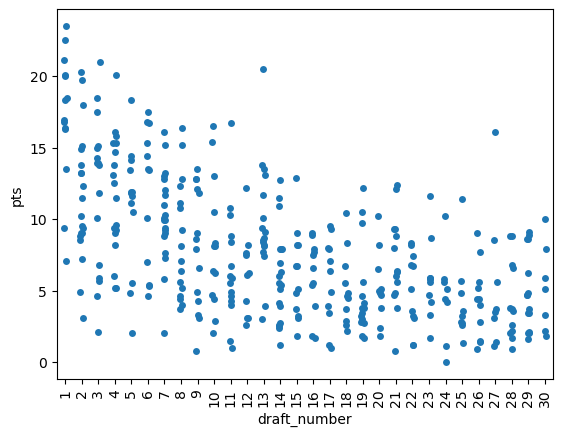

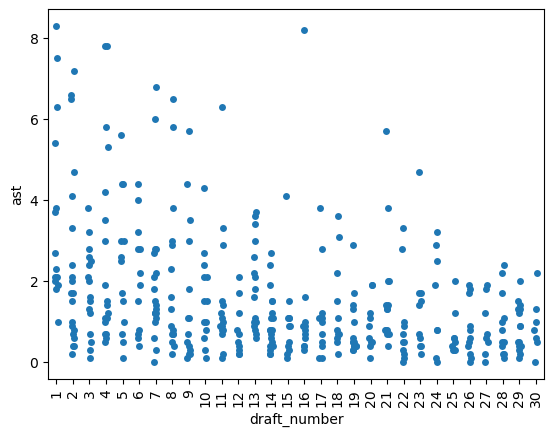

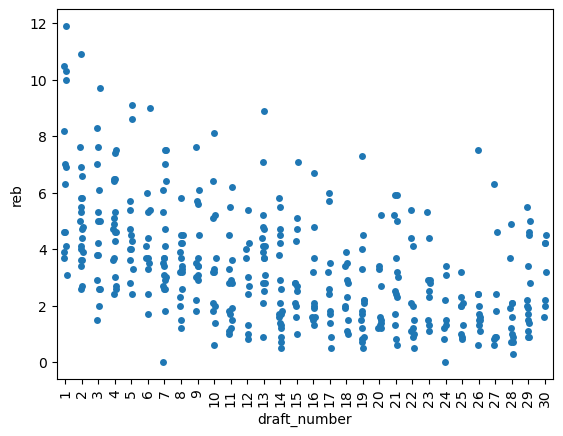

In [311]:
test = performance.sort_values(by=['draft_number'], ascending=True)
def plot_stat(stat):
    sns.stripplot(test,x='draft_number',y=stat)
    plt.xticks(rotation=90)
    plt.show()

plot_stat('pts')
plot_stat('ast')
plot_stat('reb')

#playing around with stats for players in same population as above

In [398]:
plt.bar(performance['ranking'],performance['net_rating'])
plt.xticks(rotation=90)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_theme'

In [456]:
#Creating a dataset with historical data but only first rounders

college_analysis = college.merge(player_df,left_on="college",right_on="college",suffixes=('_left', '_right'))
college_analysis = college_analysis.loc[(college_analysis['draft_round'] == '1') & \
                                        (college_analysis['college'] != 'None') & \
                                        (college_analysis['draft_year'] >= 1996)]
college_analysis

,ranking,college,num_first_rounders,player_name,team_abbreviation,age,player_height,player_weight,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,start_year,year_rank
0,0,Kentucky,42,Tony Delk,CHH,23.0,187.96,85.728888,USA,1996,1,16,61,5.4,1.6,1.6,0.9,0.044,0.090,0.182,0.596,0.187,1996-97,1996,1.0
2,0,Kentucky,42,Walter McCarty,NYK,23.0,208.28,104.326160,USA,1996,1,19,35,1.8,0.7,0.4,3.2,0.056,0.080,0.217,0.431,0.116,1996-97,1996,1.0
3,0,Kentucky,42,Antoine Walker,BOS,20.0,205.74,101.604608,USA,1996,1,6,82,17.5,9.0,3.2,-9.3,0.103,0.189,0.251,0.474,0.150,1996-97,1996,1.0
6,0,Kentucky,42,Derek Anderson,CLE,23.0,195.58,88.450440,USA,1997,1,13,66,11.7,2.8,3.4,3.9,0.038,0.091,0.215,0.531,0.219,1997-98,1997,1.0
8,0,Kentucky,42,Tony Delk,GSW,24.0,187.96,87.089664,USA,1996,1,16,77,10.1,2.2,2.2,-9.3,0.024,0.086,0.254,0.452,0.194,1997-98,1997,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,141,South Carolina,1,Renaldo Balkman,NYK,23.0,203.20,94.347136,USA,2006,1,20,65,3.4,3.3,0.6,-4.6,0.096,0.162,0.126,0.492,0.066,2007-08,2007,2.0
9697,141,South Carolina,1,Renaldo Balkman,DEN,24.0,203.20,94.347136,USA,2006,1,20,53,5.0,3.8,0.6,3.7,0.130,0.172,0.144,0.585,0.068,2008-09,2008,1.0
9699,141,South Carolina,1,Renaldo Balkman,DEN,25.0,203.20,94.347136,USA,2006,1,20,13,1.1,1.8,0.5,-22.4,0.045,0.211,0.128,0.339,0.108,2009-10,2009,2.0
9700,141,South Carolina,1,Renaldo Balkman,NYK,26.0,203.20,94.347136,USA,2006,1,20,8,2.0,0.9,0.3,0.4,0.034,0.089,0.106,0.542,0.047,2010-11,2010,3.0


In [339]:
test = college_analysis.groupby(['player_name', 'college', 'ranking'])['start_year'].count().reset_index()

test

,player_name,college,ranking,start_year
0,AJ Griffin,Duke,1,1
1,Aaron Brooks,Oregon,26,10
2,Aaron Gordon,Arizona,4,9
3,Aaron Holiday,UCLA,5,5
4,Aaron Nesmith,Vanderbilt,33,3
...,...,...,...,...
663,Zach Randolph,Michigan State,11,17
664,Zeke Nnaji,Arizona,4,3
665,Zhaire Smith,Texas Tech,60,2
666,Ziaire Williams,Stanford,24,2


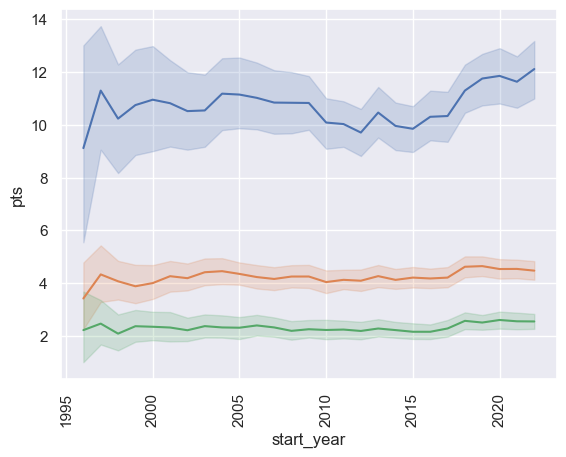

In [420]:
college_analysis['draft_number'] = pd.to_numeric(college_analysis['draft_number'])
college_analysis = college_analysis.sort_values(by=['draft_number'], ascending=True)
func_df = college_analysis.loc[(college_analysis['ranking'] <= 30)]
sns.lineplot(func_df,x='start_year',y='pts')
sns.lineplot(func_df,x='start_year',y=('reb'))
sns.lineplot(func_df,x='start_year',y=('ast'))    
plt.xticks(rotation=90)
plt.show()



(array([366., 607., 886., 441., 343., 323., 108.,  66.,  12.,   3.]),
 array([19. , 21.4, 23.8, 26.2, 28.6, 31. , 33.4, 35.8, 38.2, 40.6, 43. ]),
 <BarContainer object of 10 artists>)

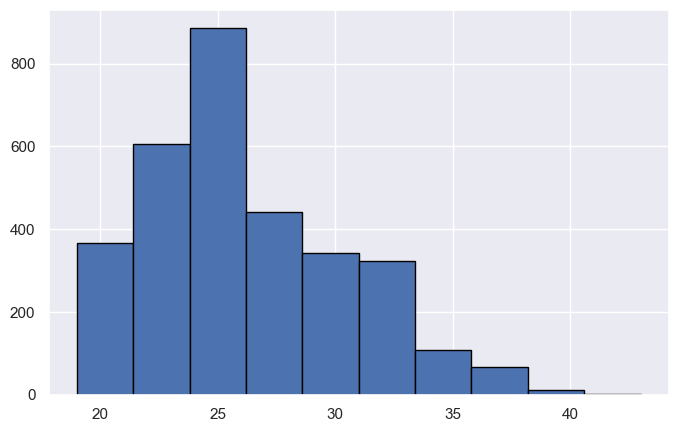

In [433]:
plt.figure(figsize=(8, 5))
plt.hist(func_df['age'], bins=10, edgecolor='black')


(array([ 397., 2569., 2528., 2965., 1554., 1674.,  829.,  229.,   90.,
           9.]),
 array([18. , 20.6, 23.2, 25.8, 28.4, 31. , 33.6, 36.2, 38.8, 41.4, 44. ]),
 <BarContainer object of 10 artists>)

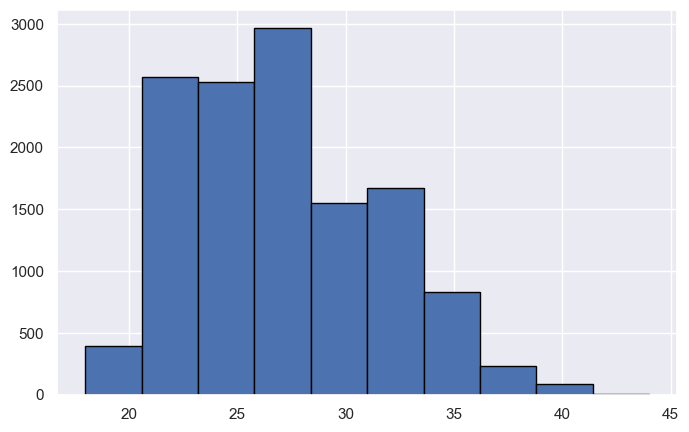

In [434]:
plt.figure(figsize=(8, 5))
plt.hist(player_df['age'], bins=10, edgecolor='black')

In [577]:
stat_df = college_analysis.loc[(college_analysis['ranking'] < 11)]
stat_df = stat_df.groupby(['player_name', 'college', 'ranking']).agg({'start_year':'count','pts':'mean'}).reset_index()
stat_df = stat_df.groupby(['college', 'ranking']).agg({'start_year':'mean','pts':'mean'}).reset_index()
stat_df = stat_df.sort_values(by=['ranking'], ascending=True)
stat_df


,college,ranking,start_year,pts
4,Kentucky,0,7.431818,11.511303
2,Duke,1,6.842105,10.699920
6,North Carolina,2,7.888889,8.295568
3,Kansas,3,8.080000,8.855753
0,Arizona,4,8.631579,9.881325
9,UCLA,5,7.833333,9.768900
1,Connecticut,6,9.529412,9.974220
10,Washington,7,6.153846,8.942852
7,Syracuse,8,6.357143,6.924668
8,Texas,9,6.600000,9.900683


Text(0, 0.5, 'Avg years in the NBA')

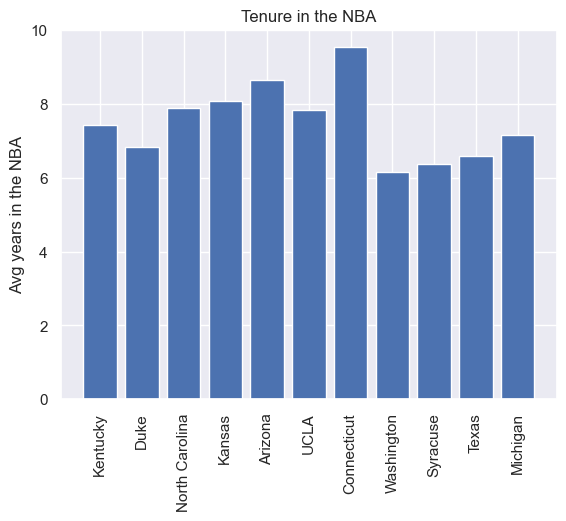

In [575]:
stat_df = 
plt.bar(stat_df['college'],stat_df['start_year'])
plt.xticks(rotation=90)
plt.title('Tenure in the NBA')
plt.ylabel('Avg years in the NBA')

In [580]:
college_analysis['pts'].mean()

10.36811048336472